In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [2]:
wiki_nobel_laureates = requests.get("https://en.wikipedia.org/wiki/List_of_Nobel_laureates")

In [3]:
LaureatesDataFrame = pd.read_html(wiki_nobel_laureates.text)[0][:-1]
LaureatesDataFrame.head()

C:\Users\Adeloye Victor\AppData\Local\Temp\ipykernel_21500\3792718324.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  LaureatesDataFrame = pd.read_html(wiki_nobel_laureates.text)[0][:-1]


,Year,Physics,Chemistry,Physiology or Medicine,Literature,Peace,Prize in Economic Sciences [13][a]
0,1901,Wilhelm Röntgen,Jacobus Henricus van 't Hoff,Emil von Behring,Sully Prudhomme,Henry Dunant; Frédéric Passy,—
1,1902,Hendrik Lorentz; Pieter Zeeman,Emil Fischer,Ronald Ross,Theodor Mommsen,Élie Ducommun; Charles Albert Gobat,—
2,1903,Henri Becquerel; Pierre Curie; Marie Curie,Svante Arrhenius,Niels Ryberg Finsen,Bjørnstjerne Bjørnson,Randal Cremer,—
3,1904,Lord Rayleigh,William Ramsay,Ivan Pavlov,Frédéric Mistral; José Echegaray,Institut de Droit International,—
4,1905,Philipp Lenard,Adolf von Baeyer,Robert Koch,Henryk Sienkiewicz,Bertha von Suttner,—


In [4]:
LaureatesDataFrame.columns = LaureatesDataFrame.columns.str.strip().str.lower().str.replace(" ", "_")

In [5]:
LaureatesDataFrame.head(10)

,year,physics,chemistry,physiology_or_medicine,literature,peace,prize_in_economic_sciences_[13][a]
0,1901,Wilhelm Röntgen,Jacobus Henricus van 't Hoff,Emil von Behring,Sully Prudhomme,Henry Dunant; Frédéric Passy,—
1,1902,Hendrik Lorentz; Pieter Zeeman,Emil Fischer,Ronald Ross,Theodor Mommsen,Élie Ducommun; Charles Albert Gobat,—
2,1903,Henri Becquerel; Pierre Curie; Marie Curie,Svante Arrhenius,Niels Ryberg Finsen,Bjørnstjerne Bjørnson,Randal Cremer,—
3,1904,Lord Rayleigh,William Ramsay,Ivan Pavlov,Frédéric Mistral; José Echegaray,Institut de Droit International,—
4,1905,Philipp Lenard,Adolf von Baeyer,Robert Koch,Henryk Sienkiewicz,Bertha von Suttner,—
5,1906,J. J. Thomson,Henri Moissan,Camillo Golgi; Santiago Ramón y Cajal,Giosuè Carducci,Theodore Roosevelt,—
6,1907,Albert A. Michelson,Eduard Buchner,Charles Louis Alphonse Laveran,Rudyard Kipling,Ernesto Teodoro Moneta; Louis Renault,—
7,1908,Gabriel Lippmann,Ernest Rutherford,Élie Metchnikoff; Paul Ehrlich,Rudolf Christoph Eucken,Klas Pontus Arnoldson; Fredrik Bajer,—
8,1909,Karl Ferdinand Braun; Guglielmo Marconi,Wilhelm Ostwald,Emil Theodor Kocher,Selma Lagerlöf,Auguste Beernaert; Paul Henri Balluet d'Estour...,—
9,1910,Johannes Diderik van der Waals,Otto Wallach,Albrecht Kossel,Paul Heyse,International Peace Bureau,—


In [6]:
PhysiologyLaureates = LaureatesDataFrame.physiology_or_medicine.str.split(";", expand=True)

In [7]:
PhysiologyLaureates.head()

,0,1,2
0,Emil von Behring,None,None
1,Ronald Ross,None,None
2,Niels Ryberg Finsen,None,None
3,Ivan Pavlov,None,None
4,Robert Koch,None,None


In [8]:
PhysiologyLaureates["year"] = LaureatesDataFrame.year

In [9]:
PhysiologyLaureates.head()

,0,1,2,year
0,Emil von Behring,None,None,1901
1,Ronald Ross,None,None,1902
2,Niels Ryberg Finsen,None,None,1903
3,Ivan Pavlov,None,None,1904
4,Robert Koch,None,None,1905


In [10]:
PhysiologyLaureates = PhysiologyLaureates.set_index("year").stack().reset_index().drop("level_1", axis="columns").rename({0: "name"}, axis="columns")

In [11]:
PhysiologyLaureates

,year,name
0,1901,Emil von Behring
1,1902,Ronald Ross
2,1903,Niels Ryberg Finsen
3,1904,Ivan Pavlov
4,1905,Robert Koch
...,...,...
225,2021,David Julius
226,2021,Ardem Patapoutian
227,2022,Svante Pääbo
228,2023,Katalin Karikó


In [12]:
wiki_laureates_by_country = requests.get("https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_country")

In [13]:
laureates_soup = BeautifulSoup(wiki_laureates_by_country.text)

In [14]:
CountryList = [x.findChild("h3").text for x in laureates_soup.find_all(class_="mw-heading3")]

In [15]:
CountryList

['Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 "China, People's Republic of",
 'China, Republic of',
 'Colombia',
 'Congo, Democratic Republic',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'East Timor',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hungary',
 'Iceland',
 'India',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kenya',
 'Lebanon',
 'Latvia',
 'Liberia',
 'Lithuania',
 'Luxembourg',
 'Mexico',
 'Myanmar (Burma)',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'North Macedonia',
 'Norway',
 'Pakistan',
 'Palestine',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia and Soviet Union',
 'Saint Lucia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Tanzania',
 'Tr

In [16]:
LaureateCountryList = [x.text for x in laureates_soup.find_all("ol", class_=False)]

In [17]:
LaureateCountryList

['Claude Cohen-Tannoudji*, Physics, 1997\nAlbert Camus*, Literature, 1957',
 'César Milstein*, Physiology or Medicine, 1984\nAdolfo Pérez Esquivel, Peace, 1980\nLuis Federico Leloir, born in France, Chemistry, 1970\nBernardo Houssay, Physiology or Medicine, 1947\nCarlos Saavedra Lamas, Peace, 1936',
 'Emmanuelle Charpentier**, born in France, Chemistry, 2020[7]\nArdem Patapoutian**, born in Lebanon, Physiology or Medicine, 2021[8]\nDaron Acemoglu**, born in Turkey, Economics, 2024[9]',
 'Brian Schmidt, born in the United States, Physics, 2011\nElizabeth Blackburn*, Physiology or Medicine, 2009\nBarry Marshall, Physiology or Medicine, 2005\nJ. Robin Warren, Physiology or Medicine, 2005\nPeter C. Doherty, Physiology or Medicine, 1996\nRolf Zinkernagel, Physiology or Medicine, 1996\nJohn Cornforth*, Chemistry, 1975\nPatrick White, born in the United Kingdom, Literature, 1973\nAleksandr M. Prokhorov, Physics, 1964\nJohn Carew Eccles, Physiology or Medicine, 1963\nSir Frank Macfarlane Burne

In [18]:
list(zip(CountryList, LaureateCountryList))

[('Algeria',
  'Claude Cohen-Tannoudji*, Physics, 1997\nAlbert Camus*, Literature, 1957'),
 ('Argentina',
  'César Milstein*, Physiology or Medicine, 1984\nAdolfo Pérez Esquivel, Peace, 1980\nLuis Federico Leloir, born in France, Chemistry, 1970\nBernardo Houssay, Physiology or Medicine, 1947\nCarlos Saavedra Lamas, Peace, 1936'),
 ('Armenia',
  'Emmanuelle Charpentier**, born in France, Chemistry, 2020[7]\nArdem Patapoutian**, born in Lebanon, Physiology or Medicine, 2021[8]\nDaron Acemoglu**, born in Turkey, Economics, 2024[9]'),
 ('Australia',
  'Brian Schmidt, born in the United States, Physics, 2011\nElizabeth Blackburn*, Physiology or Medicine, 2009\nBarry Marshall, Physiology or Medicine, 2005\nJ. Robin Warren, Physiology or Medicine, 2005\nPeter C. Doherty, Physiology or Medicine, 1996\nRolf Zinkernagel, Physiology or Medicine, 1996\nJohn Cornforth*, Chemistry, 1975\nPatrick White, born in the United Kingdom, Literature, 1973\nAleksandr M. Prokhorov, Physics, 1964\nJohn Carew E

In [19]:
LaureateCountryDF = pd.DataFrame([{"Country": x[0], "Data": x[1]} for x in zip(CountryList, LaureateCountryList)])

In [20]:
LaureateCountryDF.head()

,Country,Data
0,Algeria,"Claude Cohen-Tannoudji*, Physics, 1997\nAlbert..."
1,Argentina,"César Milstein*, Physiology or Medicine, 1984\..."
2,Armenia,"Emmanuelle Charpentier**, born in France, Chem..."
3,Australia,"Brian Schmidt, born in the United States, Phys..."
4,Austria,"Anton Zeilinger, Physics, 2022\nPeter Handke, ..."


In [21]:
TempDf = LaureateCountryDF.Data.str.split("\n", expand=True)

In [22]:
TempDf["Country"] = LaureateCountryDF.Country

In [23]:
TempDf = TempDf.set_index("Country").stack().reset_index().drop(columns=["level_1"]).rename({0: "Laureate"}, axis="columns")

In [24]:
Country_Of_Birth = ~TempDf.Laureate.str.contains("born")

In [25]:
Country = TempDf.Country

In [26]:
TempDf = TempDf.Laureate.str.extract(r"(?P<Name>[^,\n]+)(?:.+){0,4}, (?P<Field>Physiology or Medicine|Peace|Chemistry|Physics|Economics|Literature), (?P<Year>\d{4})")

In [27]:
TempDf["Country"] = Country

In [28]:
TempDf.head()

,Name,Field,Year,Country
0,Claude Cohen-Tannoudji*,Physics,1997,Algeria
1,Albert Camus*,Literature,1957,Algeria
2,César Milstein*,Physiology or Medicine,1984,Argentina
3,Adolfo Pérez Esquivel,Peace,1980,Argentina
4,Luis Federico Leloir,Chemistry,1970,Argentina


In [29]:
TempDf.Name = TempDf.Name.str.replace("*", "")

In [30]:
TempDf["Country_Of_Birth"] = Country_Of_Birth

In [31]:
LaureateCountryDF = TempDf.copy()

In [32]:
LaureateCountryDF["Country"].replace("Russia and Soviet Union", "Russia", inplace=True)

C:\Users\Adeloye Victor\AppData\Local\Temp\ipykernel_21500\2549253139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  LaureateCountryDF["Country"].replace("Russia and Soviet Union", "Russia", inplace=True)


In [33]:
LaureateCountryDF.head()

,Name,Field,Year,Country,Country_Of_Birth
0,Claude Cohen-Tannoudji,Physics,1997,Algeria,True
1,Albert Camus,Literature,1957,Algeria,True
2,César Milstein,Physiology or Medicine,1984,Argentina,True
3,Adolfo Pérez Esquivel,Peace,1980,Argentina,True
4,Luis Federico Leloir,Chemistry,1970,Argentina,False


In [34]:
PhysiologyLaureates = LaureateCountryDF[LaureateCountryDF.Field == "Physiology or Medicine"]

In [35]:
PhysiologyLaureatesMigrated = PhysiologyLaureates[PhysiologyLaureates.Country_Of_Birth == False]

In [36]:
LaureateCounts = PhysiologyLaureatesMigrated.Country.value_counts()[:5]

In [37]:
PhysiologyLaureatesMigrated.Country.value_counts()

Country
United States     32
United Kingdom    11
Austria            3
Ukraine            2
Canada             2
Czech Republic     2
Denmark            2
Poland             2
Germany            2
Armenia            1
France             1
Finland            1
Estonia            1
Belgium            1
Russia             1
Italy              1
Hungary            1
Sweden             1
Name: count, dtype: int64

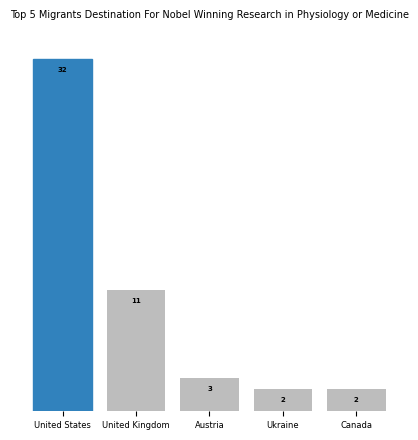

In [38]:
plt.figure(figsize=(5, 5))
bars = plt.bar(LaureateCounts.index, LaureateCounts.values, color="#bdbdbd")
bars[0].set_color("#3182bd")
plt.gca().bar_label(bars, LaureateCounts.values, label_type="edge", fontsize=5, padding=-10, fontweight="bold", color="black")
plt.box(False)
plt.title("Top 5 Migrants Destination For Nobel Winning Research in Physiology or Medicine", fontsize=7)
plt.yticks([])
plt.xticks(fontsize=6)
plt.ylim((0,35))
plt.show()

In [39]:
ChemistryLaureate = LaureateCountryDF[(LaureateCountryDF.Field == "Chemistry") & (Country_Of_Birth == False)]

In [40]:
ChemistryLaureateMigrated = ChemistryLaureate.Country.value_counts()[:5]

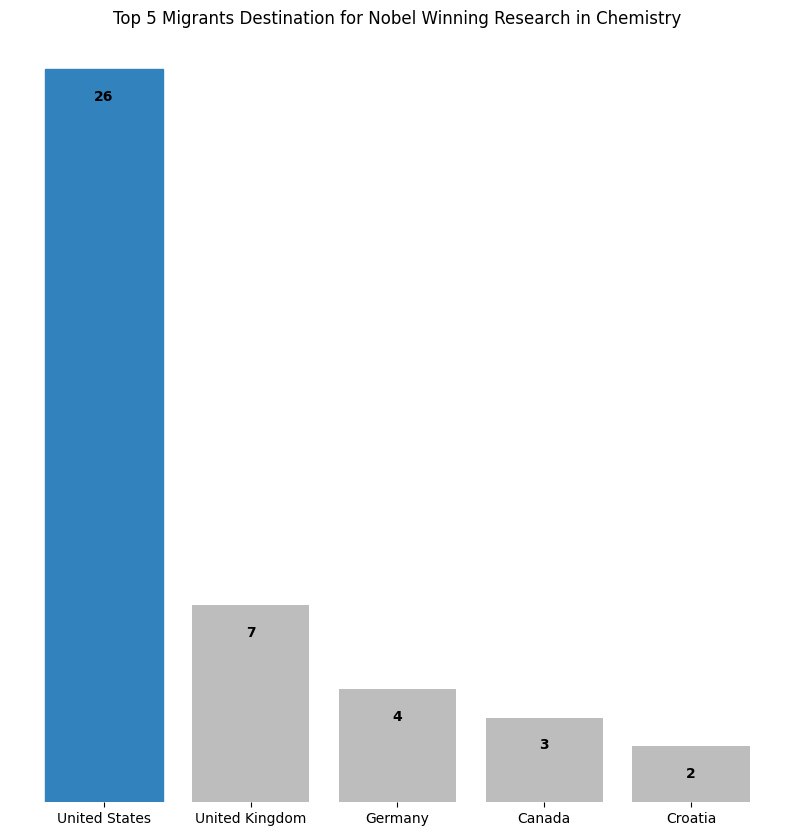

In [41]:
plt.figure(figsize=(10,10))
rects = plt.bar(ChemistryLaureateMigrated.index, ChemistryLaureateMigrated.values, color="#bdbdbd")
rects[0].set_color("#3182bd")
plt.box(False)
plt.yticks([])
plt.bar_label(rects, ChemistryLaureateMigrated.values, padding=-25, color="black", fontweight="bold")
plt.title("Top 5 Migrants Destination for Nobel Winning Research in Chemistry")
plt.show()

In [42]:
PhysicsLaureates = LaureateCountryDF[(LaureateCountryDF.Field == "Physics") & (LaureateCountryDF.Country_Of_Birth == False)]

In [43]:
PhysicsLaureatesMigrated = PhysicsLaureates.Country.value_counts()[0:5]

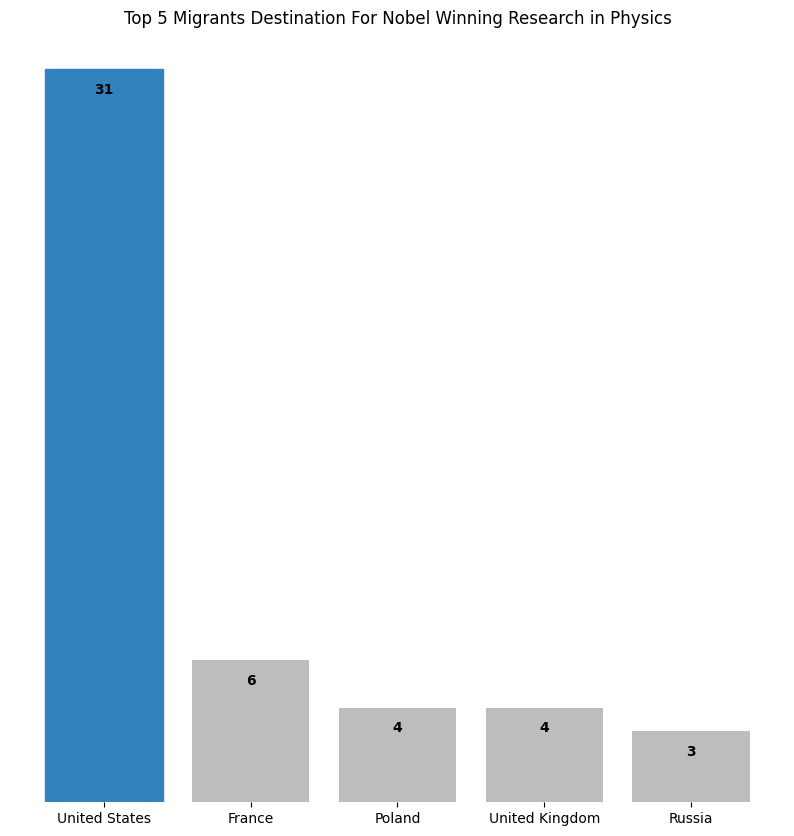

In [44]:
plt.figure(figsize=(10,10))
rects = plt.bar(PhysicsLaureatesMigrated.index, PhysicsLaureatesMigrated.values, color="#bdbdbd")
rects[0].set_color("#3182bd")
plt.box(False)
plt.yticks([])
plt.bar_label(rects, PhysicsLaureatesMigrated.values, padding=-20, fontweight="bold", color="black")
plt.title("Top 5 Migrants Destination For Nobel Winning Research in Physics")
plt.show()

In [45]:
LaureateCountryDF.head()

,Name,Field,Year,Country,Country_Of_Birth
0,Claude Cohen-Tannoudji,Physics,1997,Algeria,True
1,Albert Camus,Literature,1957,Algeria,True
2,César Milstein,Physiology or Medicine,1984,Argentina,True
3,Adolfo Pérez Esquivel,Peace,1980,Argentina,True
4,Luis Federico Leloir,Chemistry,1970,Argentina,False


In [46]:
locator = Nominatim(user_agent="Adeeeee", timeout=10)
geolocator = RateLimiter(locator.geocode, min_delay_seconds=1)
location = geolocator("United States")

In [47]:
countries = LaureateCountryDF.Country.unique()
CountriesFullAddress = {}
for country in countries:
    try:
        CountriesFullAddress[country] = geolocator(country)
    except:
        pass

In [48]:
LaureateCountryDF["Country"].apply(lambda x: pd.Series((CountriesFullAddress[x].latitude, CountriesFullAddress[x].longitude)))

,0,1
0,28.000027,2.999983
1,28.000027,2.999983
2,-34.996496,-64.967282
3,-34.996496,-64.967282
4,-34.996496,-64.967282
...,...,...
1237,8.001871,-66.110932
1238,15.926666,107.965086
1239,16.347124,47.891527
1240,23.041237,-81.526142


In [49]:
LaureateCountryDF[["Longitude", "Latitude"]] = LaureateCountryDF.Country.apply(lambda x: pd.Series((CountriesFullAddress[x].longitude, CountriesFullAddress[x].latitude)))

In [50]:
LaureateCountryDF

,Name,Field,Year,Country,Country_Of_Birth,Longitude,Latitude
0,Claude Cohen-Tannoudji,Physics,1997,Algeria,True,2.999983,28.000027
1,Albert Camus,Literature,1957,Algeria,True,2.999983,28.000027
2,César Milstein,Physiology or Medicine,1984,Argentina,True,-64.967282,-34.996496
3,Adolfo Pérez Esquivel,Peace,1980,Argentina,True,-64.967282,-34.996496
4,Luis Federico Leloir,Chemistry,1970,Argentina,False,-64.967282,-34.996496
...,...,...,...,...,...,...,...
1237,Baruj Benacerraf,Physiology or Medicine,1980,Venezuela,True,-66.110932,8.001871
1238,Lê Đức Thọ,Peace,1973,Vietnam,False,107.965086,15.926666
1239,Tawakkol Karman,Peace,2011,Yemen,True,47.891527,16.347124
1240,Ivo Andrić,Literature,1961,Yugoslavia,False,-81.526142,23.041237


In [51]:
geometry = gpd.points_from_xy(LaureateCountryDF.Longitude, LaureateCountryDF.Latitude)

In [52]:
geo_df = gpd.GeoDataFrame(LaureateCountryDF, geometry=geometry)

In [53]:
tempGeoDf = geo_df[geo_df["Country_Of_Birth"] == False]

In [54]:

map = folium.Map(location=[0, 0], zoom_start=1)

In [55]:

from folium.plugins import FastMarkerCluster

map = folium.Map(location=[0, 0], tiles="Cartodb dark_matter", zoom_start=2.2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in tempGeoDf.geometry]

FastMarkerCluster(data=heat_data).add_to(map)
map

In [56]:
map.save("NobelWinners.html")

In [57]:
# map.save("NobelWinners.png")